In [2]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet
import pymannkendall as mk

Importing plotly failed. Interactive plots will not work.


In [3]:
well_data = pd.read_excel('../data/Data-Wells.xlsx')

well_data.head(10)

,Sample ID,Well Name,Entered,"1,4-Dioxane Results (ppb)",Date Sampled,Time Sampled,Date Received,Date Analyzed,Reporting Limit,Reporting Lab,...,Well Comments,Scr Elev Range,bar color,BegFolder KML,EndFolder KML,BegFolder2KML,EndFolder2KML,Max-to-date.1,MaxToDateFlag,Last Date Rd
0,76970,1021 Westview Way,05/10/19,nd,05/08/19,14:05,NaN,05/15/19,1.0,PLS,...,NaN,NaN,green,<Folder><name>1021 Westview Way</name>,</Folder>,<Folder><name>n/a</name>,NaN,0.001,NaN,2019-05-08 00:00:00
1,76971,1024 Westview Way,05/10/19,nd,05/08/19,14:18,NaN,05/15/19,1.0,PLS,...,NaN,NaN,green,<Folder><name>1024 Westview Way</name>,</Folder>,NaN,NaN,0.001,NaN,2019-05-08 00:00:00
2,76969,1049 Westview Way,05/10/19,nd,05/08/19,14:43,NaN,05/14/19,1.0,PLS,...,NaN,NaN,green,<Folder><name>1049 Westview Way</name>,</Folder>,NaN,</Folder>,0.001,NaN,2019-05-08 00:00:00
3,3525,105 Myrtle,NaN,nd,03/27/99,NaN,NaN,NaN,1.0,MEG,...,Replacement water supply well.,800-820,green,<Folder><name>105 Myrtle</name>,NaN,<Folder><name>800-820</name>,NaN,0.001,NaN,2019-04-15 00:00:00
4,3714,105 Myrtle,NaN,nd,05/28/99,NaN,NaN,NaN,1.0,MEG,...,Replacement water supply well.,800-820,green,NaN,NaN,NaN,NaN,0.001,NaN,2019-04-15 00:00:00
5,4013,105 Myrtle,NaN,nd,08/19/99,NaN,NaN,NaN,1.0,MEG,...,Replacement water supply well.,800-820,green,NaN,NaN,NaN,NaN,0.001,NaN,2019-04-15 00:00:00
6,4337,105 Myrtle,NaN,nd,11/16/99,NaN,NaN,NaN,1.0,MEG,...,Replacement water supply well.,800-820,green,NaN,NaN,NaN,NaN,0.001,NaN,2019-04-15 00:00:00
7,4671,105 Myrtle,NaN,nd,02/21/00,NaN,NaN,NaN,1.0,MEG,...,Replacement water supply well.,800-820,green,NaN,NaN,NaN,NaN,0.001,NaN,2019-04-15 00:00:00
8,5428,105 Myrtle,NaN,nd,08/21/00,NaN,NaN,NaN,1.0,MEG,...,Replacement water supply well.,800-820,green,NaN,NaN,NaN,NaN,0.001,NaN,2019-04-15 00:00:00
9,74144,105 Myrtle,06/19/14,nd,06/18/14,12:15,NaN,06/26/14,1.0,PLS,...,Replacement water supply well.,800-820,green,NaN,NaN,NaN,NaN,0.001,NaN,2019-04-15 00:00:00


In [4]:
well_data.head(10)

rm_nd = well_data.loc[well_data['1,4-Dioxane Results (ppb)'] != 'nd'].copy()

rm_capital_nd = rm_nd.loc[rm_nd['1,4-Dioxane Results (ppb)'] != 'ND'].copy()

rm_capital_nd['1,4-Dioxane Results (ppb)'] = rm_capital_nd['1,4-Dioxane Results (ppb)'].map(lambda x: x.replace(',', ''))

rm_capital_nd['1,4-Dioxane Results (ppb)'] = rm_capital_nd['1,4-Dioxane Results (ppb)'].map(lambda x: x.replace('<', ''))

res = rm_capital_nd
res.loc[:, 'ds']= pd.to_datetime(res['Date Sampled'])
res.loc[:, 'dioxane_results']= pd.to_numeric(res['1,4-Dioxane Results (ppb)'])
res.head(5)

,Sample ID,Well Name,Entered,"1,4-Dioxane Results (ppb)",Date Sampled,Time Sampled,Date Received,Date Analyzed,Reporting Limit,Reporting Lab,...,bar color,BegFolder KML,EndFolder KML,BegFolder2KML,EndFolder2KML,Max-to-date.1,MaxToDateFlag,Last Date Rd,ds,dioxane_results
16,57,110 Parkland Plaza,NaN,17,08/22/86,NaN,NaN,NaN,1.0,NaN,...,orange,<Folder><name>110 Parkland Plaza</name>,NaN,<Folder><name>840-860</name>,NaN,17.0,MaxToDate,2019-09-12 00:00:00,1986-08-22,17.0
17,58,110 Parkland Plaza,NaN,17,09/19/86,NaN,NaN,NaN,1.0,NaN,...,orange,NaN,NaN,NaN,NaN,17.0,MaxToDate,2019-09-12 00:00:00,1986-09-19,17.0
18,61,110 Parkland Plaza,NaN,12,10/10/86,NaN,NaN,NaN,1.0,NaN,...,orange,NaN,NaN,NaN,NaN,17.0,NaN,2019-09-12 00:00:00,1986-10-10,12.0
19,62,110 Parkland Plaza,NaN,1,10/10/86,NaN,NaN,NaN,1.0,NaN,...,yellow,NaN,NaN,NaN,NaN,17.0,NaN,2019-09-12 00:00:00,1986-10-10,1.0
20,187,110 Parkland Plaza,NaN,7,11/09/87,NaN,NaN,NaN,1.0,NaN,...,orange,NaN,NaN,NaN,NaN,17.0,NaN,2019-09-12 00:00:00,1987-11-09,7.0


In [5]:
di_time = res.iloc[:, lambda df: df.columns.str.contains('Well Name|ds|dioxane_results',
                                              case=False)].copy()
di_time.rename(columns = {'dioxane_results':'y'}, inplace = True)
di_time.head(20)

,Well Name,ds,y
16,110 Parkland Plaza,1986-08-22,17.0
17,110 Parkland Plaza,1986-09-19,17.0
18,110 Parkland Plaza,1986-10-10,12.0
19,110 Parkland Plaza,1986-10-10,1.0
20,110 Parkland Plaza,1987-11-09,7.0
21,110 Parkland Plaza,1987-11-09,18.0
22,110 Parkland Plaza,1988-04-18,13.0
23,110 Parkland Plaza,1988-12-09,14.0
24,110 Parkland Plaza,1989-07-19,11.0
25,110 Parkland Plaza,1990-01-30,12.0


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


110 Parkland Plaza
          ds       yhat
0 2020-01-01  -5.275957
1 2020-02-01   2.537763
2 2020-03-01  -0.758883
3 2020-04-01  33.126382
4 2020-05-01   1.786537
170 Aprill
          ds       yhat
0 2020-01-01  40.966102
1 2020-02-01  27.338995
2 2020-03-01  52.430993
3 2020-04-01  -4.111423
4 2020-05-01  28.273497


<Figure size 360x720 with 0 Axes>

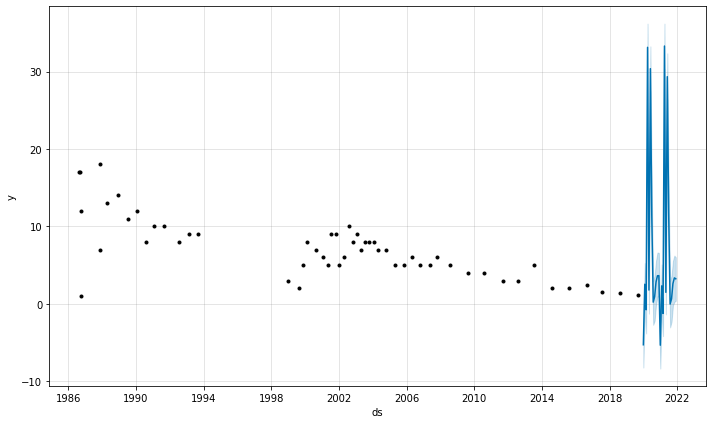

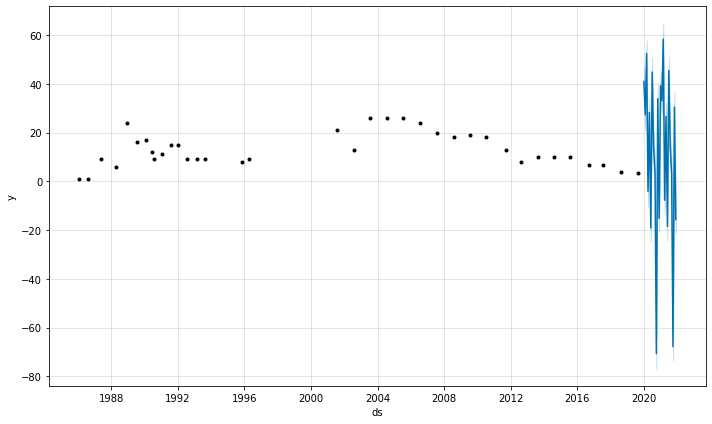

,Well name,trend,h,p,z,Tau,s,var_s,slope,intercept
0,110 Parkland Plaza,decreasing,True,2.326843e-10,-6.338055,-0.591195,-846.0,17774.666667,-0.2,12.3
1,170 Aprill,no trend,False,7.427813e-01,-0.328172,-0.039683,-25.0,5348.333333,0.0,10.5


In [21]:
max_value = di_time["y"].max()

grouped = di_time.groupby('Well Name')
count = 1
n_rows = 2
n_cols = 1
fig = plt.figure(figsize=(5*n_cols, 5*n_rows))

mk_res = []

for name, group in grouped:
    if count > n_rows:
        break
    if len(group) < 10:
        continue
    print(name)
    # print(group)
    test = group
    # test['floor'] = 0
    # test['cap'] = max_value

    model = Prophet()
    # fit the model
    model.fit(test)
    # define the period for which we want a prediction
    future = list()
    for y in range(0, 2):
        for i in range(1, 13):
            date = '%04d-%02d' % (2020 + y,  i)
            future.append([date])

    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['ds']= pd.to_datetime(future['ds'])
    # future['floor'] = 0
    # future['cap'] = max_value
    # future['floor'] = 1.5
    # use the model to make a forecast
    forecast = model.predict(future)
    # summarize the forecast
    print(forecast[['ds', 'yhat']].head())
    # plot forecast
    model.plot(forecast)
    plt.show()

    # ax = fig.add_subplot(n_rows, n_cols, count)
    # ax.plot(test.ds, test.y)
    #  ax.title.set_text(name+'\n')

    # Data generation for analysis
    data = test.y
    trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(data)

    mk_res.append([name, trend, h, p, z, Tau, s, var_s, slope, intercept])

    count+=1


mk_df = pd.DataFrame(mk_res, columns=['Well name', 'trend', 'h', 'p', 'z', 'Tau', 's', 'var_s','slope' , 'intercept'])
mk_df

In [26]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mean_absolute_percentage_error(y_test, y_pred)

ImportError: cannot import name 'mean_absolute_percentage_error' from 'sktime.performance_metrics.forecasting' (/Users/zhangziliang/.virtualenvs/Gelman-Plume-Analysis/lib/python3.7/site-packages/sktime/performance_metrics/forecasting/__init__.py)